In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
data=pd.read_csv("data\Annotations_Metadata.csv")

In [3]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


In [4]:
# Assume that the dataset 
data['pseudo_timestamp']=pd.to_datetime(data.index)

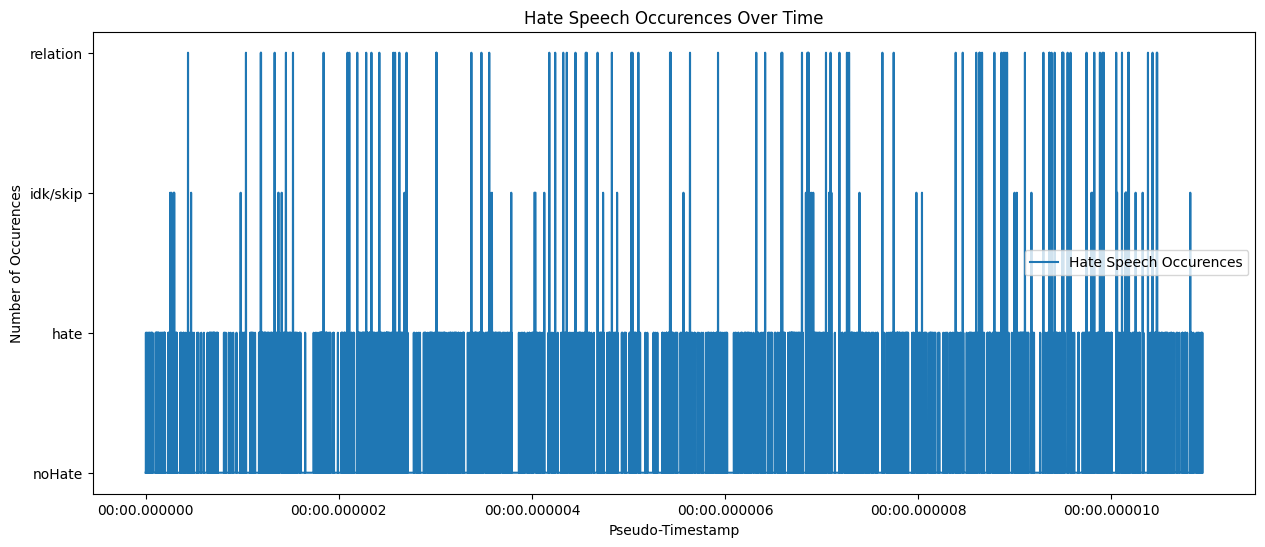

In [5]:
# Visualize hate speech occurrences over time
plt.figure(figsize=(15,6))
plt.plot(data['pseudo_timestamp'],data['label'],label='Hate Speech Occurences')
plt.title('Hate Speech Occurences Over Time')
plt.xlabel('Pseudo-Timestamp')
plt.ylabel('Number of Occurences')
plt.legend()
plt.show()

In [6]:
label_encoder=LabelEncoder()
data['label_encoded']=label_encoder.fit_transform(data['label'])

In [7]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label,pseudo_timestamp,label_encoded
0,12834217_1,572066,1346,0,noHate,1970-01-01 00:00:00.000000000,2
1,12834217_2,572066,1346,0,noHate,1970-01-01 00:00:00.000000001,2
2,12834217_3,572066,1346,0,noHate,1970-01-01 00:00:00.000000002,2
3,12834217_4,572066,1346,0,hate,1970-01-01 00:00:00.000000003,0
4,12834217_5,572066,1346,0,noHate,1970-01-01 00:00:00.000000004,2


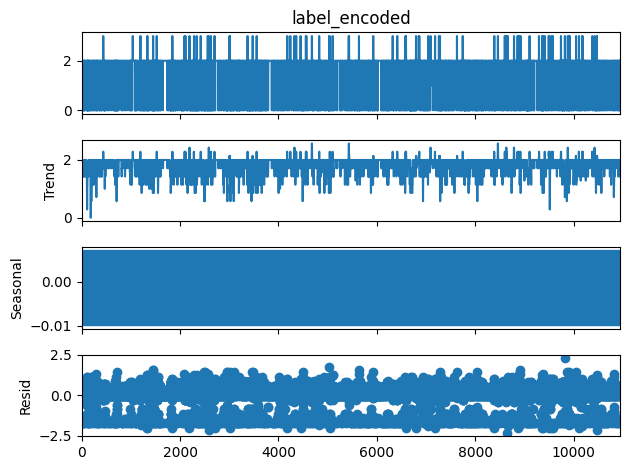

In [8]:
# Decompose the time series into trend, seasonability, residuals
result=seasonal_decompose(data['label_encoded'],model='additive',period=7)
result.plot()
plt.show()

In [9]:
# Augmented Dickey-Fuller Test for stationarity
adf_test = adfuller(data['label_encoded'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('Results:')
print('The time series is stationary.' if adf_test[1] <= 0.05 else 'The time series is not stationary.')

ADF Statistic: -35.45295235221691
p-value: 0.0
Results:
The time series is stationary.


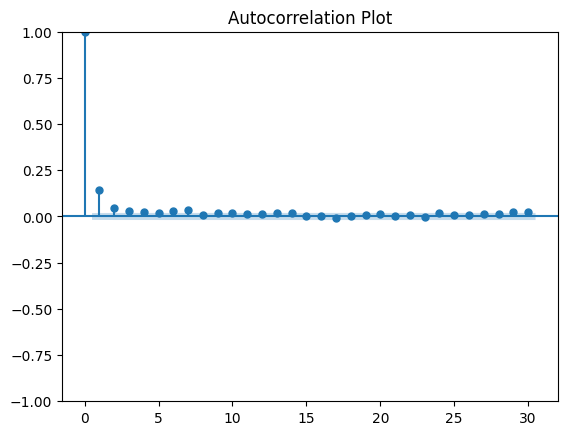

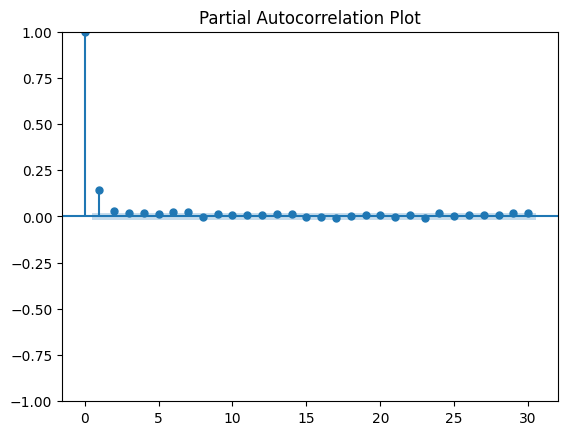

In [10]:
# Autocorrelation and Partial Autocorrelation Plots
plot_acf(data['label_encoded'], lags=30)
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(data['label_encoded'], lags=30)
plt.title('Partial Autocorrelation Plot')
plt.show()